<a href="https://colab.research.google.com/github/Kinadim/ML_projet/blob/main/ML_PROJET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

# 1.Analyse des données

In [19]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [20]:
import pandas as pd

#attention le séparateur est une tabulation
df=pd.read_csv('scitweets_export.tsv', sep='\t')
display (df.head())


,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


In [21]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1140 non-null   int64  
 1   tweet_id              1140 non-null   int64  
 2   text                  1140 non-null   object 
 3   science_related       1140 non-null   int64  
 4   scientific_claim      1140 non-null   float64
 5   scientific_reference  1140 non-null   float64
 6   scientific_context    1140 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 62.5+ KB


None

In [22]:
df.describe()

,Unnamed: 0,tweet_id,science_related,scientific_claim,scientific_reference,scientific_context
count,1140.000000,1.140000e+03,1140.000000,1140.000000,1140.00000,1140.000000
mean,626.040351,8.560901e+17,0.328947,0.230702,0.17807,0.220175
std,364.412255,2.865422e+17,0.470037,0.421467,0.38274,0.414547
min,0.000000,3.166700e+17,0.000000,0.000000,0.00000,0.000000
25%,306.750000,6.176042e+17,0.000000,0.000000,0.00000,0.000000
50%,624.500000,8.615253e+17,0.000000,0.000000,0.00000,0.000000
75%,940.250000,1.103864e+18,1.000000,0.000000,0.00000,0.000000
max,1260.000000,1.344485e+18,1.000000,1.000000,1.00000,1.000000


### On observe la répartition des valeurs pour chaque colonne" 

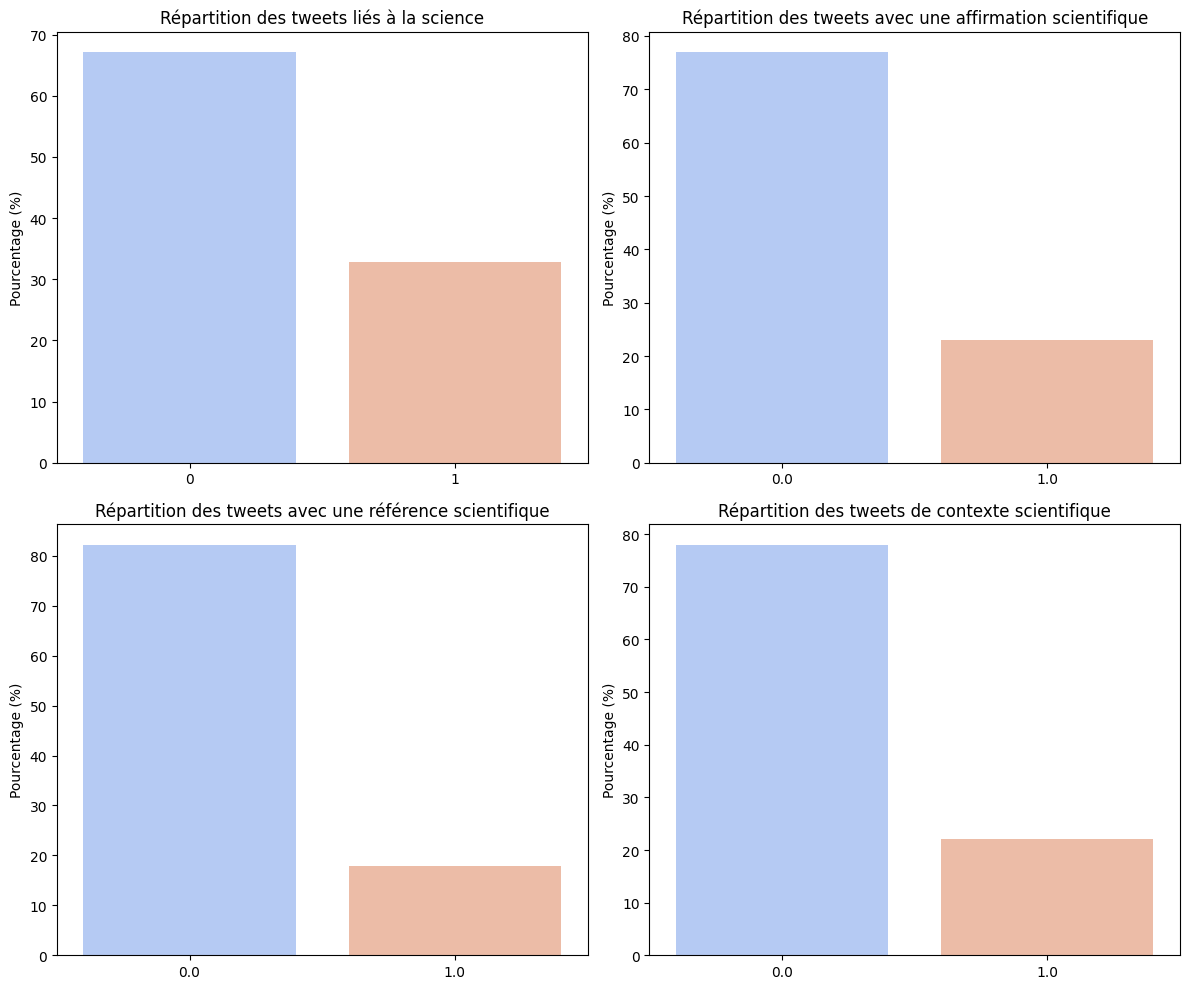

In [24]:
# Définir la figure avec 2 lignes et 2 colonnes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Liste des colonnes à afficher
columns = ['science_related', 'scientific_claim', 'scientific_reference', 'scientific_context']
titles = [
    "Répartition des tweets liés à la science",
    "Répartition des tweets avec une affirmation scientifique",
    "Répartition des tweets avec une référence scientifique",
    "Répartition des tweets de contexte scientifique"
]

# Générer les 4 countplots avec pourcentage
for ax, col, title in zip(axes.flat, columns, titles):
    total = len(df[col])  # Nombre total d'observations
    sns.barplot(
        x=df[col].value_counts(normalize=True).index,  # Valeurs uniques
        y=df[col].value_counts(normalize=True).values * 100,  # Pourcentage
        ax=ax, palette="coolwarm"
    )
    ax.set_title(title)
    ax.set_xlabel("")  # Supprimer les labels des axes X pour plus de lisibilité
    ax.set_ylabel("Pourcentage (%)")

# Ajuster l'espacement
plt.tight_layout()
plt.show()


On remarque que la majorité des tweets de notre dataset d'entrainement ne sont pas scienfifiques

### On regarde la densité de valeur présente

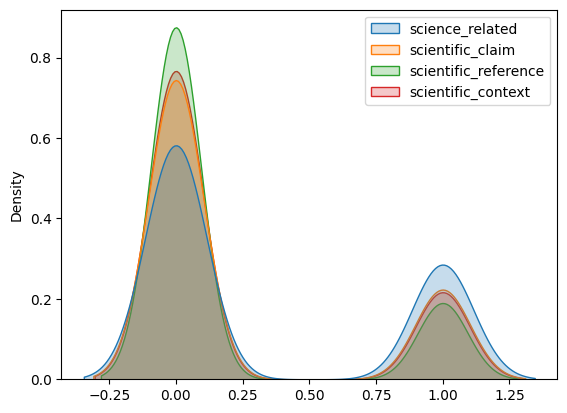

In [25]:
sns.kdeplot(data=df_numerique, fill=True)
plt.show()

# 2. Nettoyage des données

In [26]:


import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    return tweet

def preprocess_tweet(tweet):
    tweet = clean_tweet(tweet)
    tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_tweet'] = df['text'].apply(preprocess_tweet)
display(df)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/clementwt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/clementwt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/clementwt/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/clementwt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context,cleaned_tweet
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0,knee bit sore guess thats sign recent treadmil...
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0,mcdonalds breakfast stop gym
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0,gynecologist cancer experience explain danger ...
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0,couchlock high lead sleeping couch got ta stop...
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0,daily routine help prevent problem bipolar dis...
...,...,...,...,...,...,...,...,...
1135,1255,1340455669443350528,@LaylaFanucci @realDonaldTrump I'm sorry but w...,1,1.0,0.0,0.0,im sorry million dead covid total death u actu...
1136,1256,1340689510569549824,"Dear #NIN applicants, you can kindly download ...",0,0.0,0.0,0.0,dear nin applicant kindly download enrolment f...
1137,1258,1341155832793165825,Whats the uber support team email address?,0,0.0,0.0,0.0,whats uber support team email address
1138,1259,1344167355648241664,House passes bill to increase stimulus checks ...,0,0.0,0.0,0.0,house pass bill increase stimulus check


On a remarqué que certains tweets utilisant des mots qui n'était pas en anglais. Nous avons donc trouvé pour qu'un modèle fonctionne, il parait approprié de traduire les tweets en anglais. Pour cela nous allons utiliser les fonctionnalité de traduction proposé par Google. 

### Fonction pour traduire en anglais

In [27]:
!pip install deep-translator
from deep_translator import GoogleTranslator

def translate_to_english(tweet):
    translated = GoogleTranslator(source='auto', target='en').translate(tweet)
    return translated

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
df['translated_tweets'] = df['cleaned_tweet'].apply(translate_to_english)
display(df)
